## Исследование рынка компьютерных игр по регионам

Интернет-магазин который продаёт по всему миру видеоигры, поручил провести анализ ситуации на игровом рынке. Из открытых источников доступны данные о продажах игр за большой период времени, оценки пользователей и профильных критиков, жанры и игровые платформы. Необходимо выявить главные факторы, которые влияют на успешность игры. Это позволит сделать ставку на потенциально популярный продукт и правильным образом спланировать рекламные кампании. 

В наличии имеется большой объём данных на несколько десятилетий, в них также содержится информация о продажах в разных регионах. На основании всего этого вполне можно сделать некоторые прогнозы по продажам и популярности определённых игр на будущий год.

## 1. Знакомство с данными и предварительное изучение

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
data.info() #посмотрим общую информацию о таблице
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Имеется 11 столбцов в датафрейме.

1. *Name* — название игры (формат данных object)
2. *Platform* — платформа (формат данных object)
3. *Year_of_Release* — год выпуска (формат данных float)
4. *Genre* — жанр игры (формат данных object)
5. *NA_sales* — продажи в Северной Америке (миллионы проданных копий) (формат данных float)
6. *EU_sales* — продажи в Европе (миллионы проданных копий) (формат данных float)
7. *JP_sales* — продажи в Японии (миллионы проданных копий) (формат данных float)
8. *Other_sales* — продажи в других странах (миллионы проданных копий) (формат данных float)
9. *Critic_Score* — оценка критиков (100-балльная система) (формат данных float)
10. *User_Score* — оценка пользователей (10-балльная система) (формат данных object)
11. *Rating* — рейтинг от организации ESRB (англ. Entertainment Software Rating
Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает
им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными. (формат данных object)


Для начала неплохо бы изучить категориальные столбцы rating, platform и genre.

In [2]:
print('Значения в столбце рейтинг ESRB', data['Rating'].unique())
print('Значения в столбце платформа', data['Platform'].unique())
print('Значения в столбце жанр', data['Genre'].unique())

Значения в столбце рейтинг ESRB ['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']
Значения в столбце платформа ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Значения в столбце жанр ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]


Здесь восемь категорий рейтинга ESRB. В датафрейме представлены игры с 31 платформы и относящиеся к двенадцати жанрам.

Для последующего анализа требуется провести предобработку данных, имеются пропуски в данных, необходимо изменение названий столбцов, приведение к нужному типу данных.

## 2. Предподготовка данных

Нужно привести названия колонок в единообразный стандартный вид, все символы к нижнему регистру.

Данные в столбце 'year_of_release' (год выпуска) хранятся в формате float, для исследования их надо перевести в целочисленный. Пропуски в данном столбце могли появится из-за недостаточности данных, либо при неправильной выгрузке или заполнении базы данных. Так как некоторые игры выходили на нескольких платформах, некоторые пропуски можно попробовать заполнить соответствующим годом выхода на других платформах (за некоторым исключением игры выходят на разных платформах примерно в один год).

И надо изучить также единичные пропуски в стобце name и genre.

In [3]:
data.columns = map(str.lower, data.columns) #приводим названия столбцов к нижнему регистру
print('Пропусков в "year_of_release" до заполнения', data['year_of_release'].isna().sum())
data['year_of_release'] = (
    data['year_of_release'].fillna(data.groupby('name')['year_of_release'].transform('max'))
) #заменяем пропуски в годах выпуска медианой с группировкой по названию
data['year_of_release'] = np.floor(
    pd.to_numeric(data['year_of_release'], errors='coerce')).astype('Int64')#перевод в целочисленный формат
print('Пропусков в "year_of_release" после заполнения', data['year_of_release'].isna().sum())
print()
display('Пропущенные значения в name', data[data['name'].isna()]) #проверим записи с пропущенными названиями.

Пропусков в "year_of_release" до заполнения 269
Пропусков в "year_of_release" после заполнения 146



'Пропущенные значения в name'

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Всего две записи, с многими пропущенными значениями. Их можно удалить.

В столбцах critic_score, user_score и rating имеется довольно большое количество пропущенных значений. Не все игры отправляются ESRB для возрастного рейтинга, тем более те, которые не выпускались в США. Что касается оценок игроков или критиков, не всегда есть соответствующие данные, или их слишком мало, что правильно сагрегировать среднюю оценку.  Заменить эти пропуски адекватно, к сожалению, нечем. Интересно что в столбце user_score, который содержит среднюю оценку игроков (по 10-балльной шкале), встречаются также значения "tbd" (to be defined). Так как мне нужен данный столбец в численном формате для дальнейшего исследования, надо заменить эти 'tbd' на отсутствующие значения, и после поменять тип данных.

In [4]:
data['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

Здесь имеем 4 основных рейтинга (Everyone, Teen, Mature и Everyone 10+), а также редкие и устаревшие значения (Early childhood, Rating Pending, Kids to Adults, Adults Only 18+). Так как они составляют пренебрижимо малую долю в данных, их можно удалить. Пустые значения заменим значением "no rating".

In [5]:
data['rating'] = data['rating'].fillna('no rating')
for v in ['EC', 'RP', 'K-A', 'AO']:
    data = data.loc[data['rating'] != v]
data['rating'].value_counts()

no rating    6766
E            3990
T            2961
M            1563
E10+         1420
Name: rating, dtype: int64

In [6]:
data = data.dropna(subset=['name']) #удаление записей с пропущенными данными
print('Пропусков в name: ', data['name'].isna().sum())
data['user_score'] = data['user_score'].replace("tbd", np.NaN) #замена на отсутствующее значение
data['user_score'] = data['user_score'].astype('float') #перевод в чсиленный формат столбца

Пропусков в name:  0


Теперь нужно посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

In [7]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data['total_sales'] = data['total_sales'].round(decimals=2)

### Вывод

Данные изучены и предобработаны. Некоторые пропуски были заполнены, типы данных в некоторых столбцах были изменены для последующего исследования. Посчитаны суммарные продажи по всему миру для каждой игры.

## 3. Исследовательский анализ данных



Посмотрим, сколько игр выпускалось в разные годы, построим гистограмму для всего датафрейма.

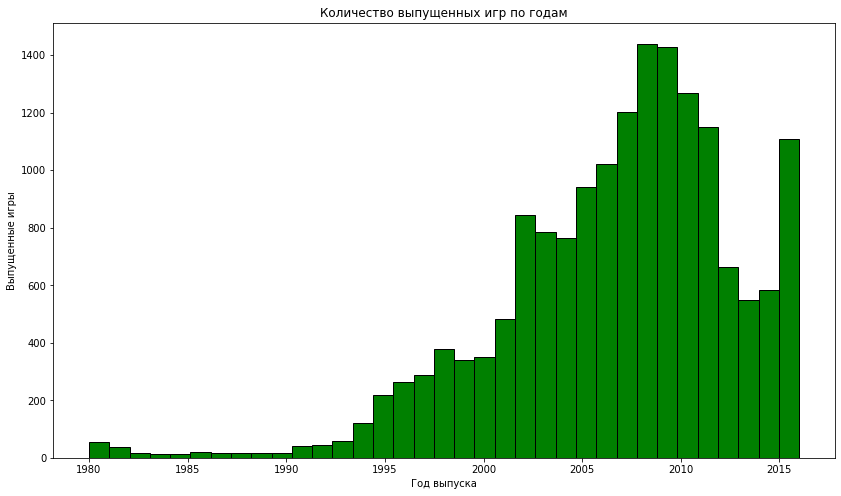

In [8]:
plt.figure(figsize=(14,8)) 
plt.hist(data.year_of_release[~np.isnan(data.year_of_release)], bins = 35, color = 'green', edgecolor = 'black')
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Выпущенные игры')
plt.show()

По гистограмме видно, что рынок видеоигр начал заметно расти уже в 90-е годы, но настоящий бурный рост случился в середине 2000-х. Затем на гистограмме спад после 2010 года - возможно, отложенные последствия мирового кризиса 2008 года, а также влияние нового сектора мобильных игр. В 2016 выпущенных игр опять много - причины до конца неясны, возможно в базу данных попала гораздо большая выборка за последний год. Объективные глобальные причины такого резкого подъёма в этом году найти сложно.

Сейчас требуется посмотреть, как менялись продажи по платформам. Выбрать платформы с
наибольшими суммарными продажами и построить распределение по годам.
За какой характерный срок появляются новые и исчезают старые платформы?

In [9]:
leaders = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(8).index.to_list() #получаем список самых популярных в плане продаж игр платформ
leaders_data = data.query('platform in @leaders').pivot_table(
    index=['year_of_release', 'platform'], values=['total_sales'], aggfunc='sum') #делаем сводную таблицу по продажам на каждой платформе в каждый год.
leaders_data.reset_index(inplace=True)
leaders_data['platform'].unique()

array(['DS', 'PS', 'GBA', 'PS2', 'PS3', 'X360', 'Wii', 'PS4'],
      dtype=object)

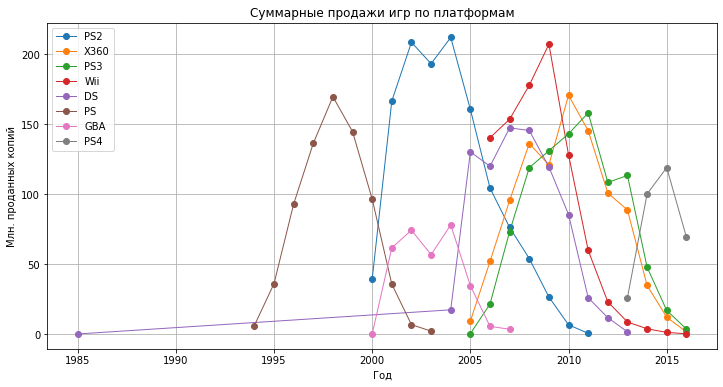

In [10]:
fig, ax = plt.subplots(figsize=(12, 6)) #строим сводный график продаж игр на популярных платформах
for platform in leaders:
    x = leaders_data[leaders_data['platform']==platform]['year_of_release']
    y = leaders_data[leaders_data['platform']==platform]['total_sales']
    ax.plot(x, y, lw=1, marker='o', label=platform)
plt.legend(loc='upper left')
plt.grid(True)
plt.xlabel('Год')
plt.ylabel('Млн. проданных копий')
plt.title('Суммарные продажи игр по платформам')
plt.show()

Что можно сказать, посмотрев на данный график? У самых популярных платформ примерно десятилетний цикл жизни, с пиком продаж игр примерно в середине. То есть наиболее популярные и продаваемые игры выходят в этот период, и самих игр тоже больше. В выбранных лидерах по продажам одна современная актуальная платформа - это PS4. От её графика и будем отталкиваться. Вышла она в 2013 году, цикл её ещё не завершился, это поможет нашим прогнозам. В нашем топе лидеров нет её главных конкурентов, которые вышли в этих же годах. Нужно более подробно рассмотреть отрезок с 2013 по 2016 годы.

In [11]:
actual_data = data[data.year_of_release >= 2013] #срез данных начиная с 2013 года

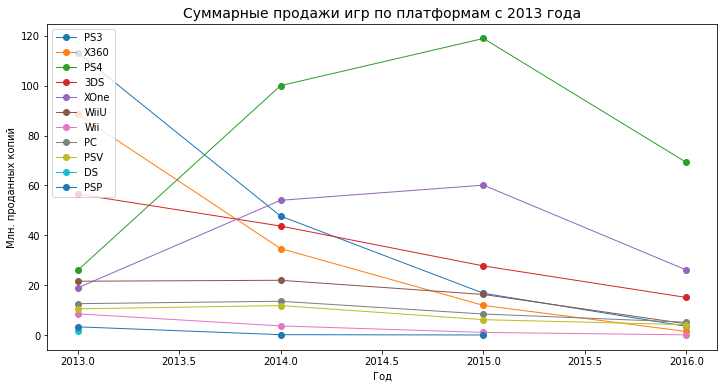

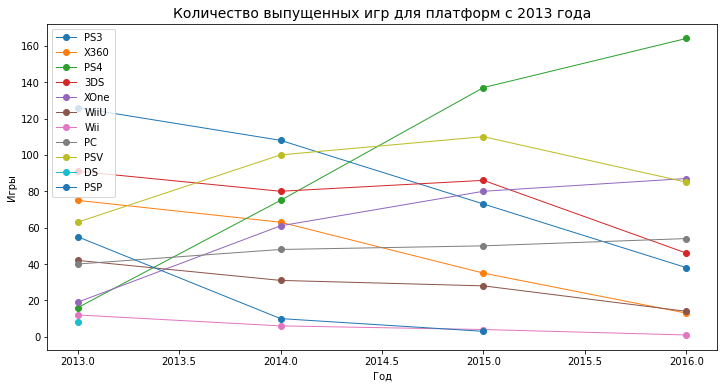

In [12]:
fig, ax = plt.subplots(figsize=(12, 6)) #cтроим график продаж за актуальный период
for platform in actual_data['platform'].unique():
    x=actual_data[actual_data['platform']==platform].groupby('year_of_release')['total_sales'].sum().index
    y=actual_data[actual_data['platform']==platform].groupby('year_of_release')['total_sales'].sum()
    ax.plot(x, y, lw=1, marker='o', label=platform)
plt.legend(loc='upper left')
plt.xlabel('Год')
plt.ylabel('Млн. проданных копий')
plt.title('Суммарные продажи игр по платформам с 2013 года', fontsize=14)
plt.show()
fig, ax = plt.subplots(figsize=(12, 6)) #cтроим график выпущенных игр за актуальный период
for platform in actual_data['platform'].unique():
    x=actual_data[actual_data['platform']==platform].groupby('year_of_release')['name'].count().index
    y=actual_data[actual_data['platform']==platform].groupby('year_of_release')['name'].count()
    ax.plot(x, y, lw=1, marker='o', label=platform)
plt.legend(loc='upper left')
plt.xlabel('Год')
plt.ylabel('Игры')
plt.title('Количество выпущенных игр для платформ с 2013 года', fontsize=14)
plt.show()

Text(0, 0.5, 'Продажи')

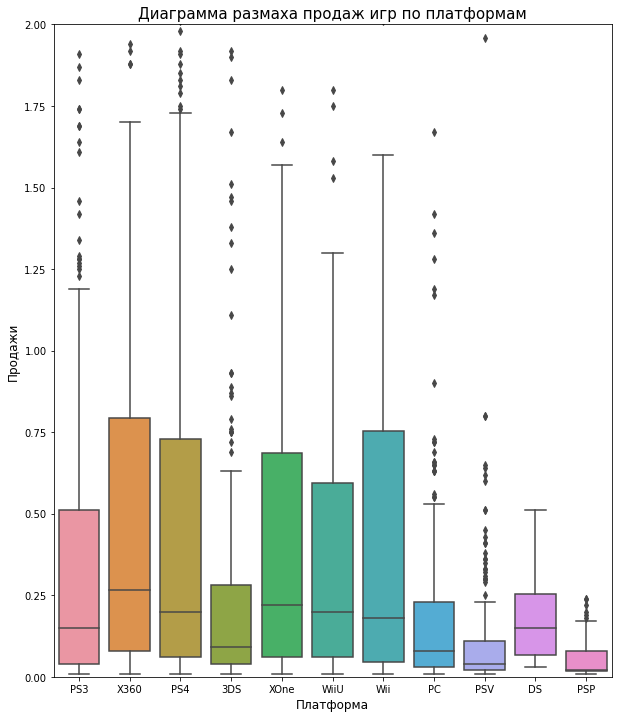

In [13]:
plt.figure(figsize=(10,12)) #строим диаграмму размаха
sns.boxplot(x='platform', y='total_sales', data=actual_data)
plt.title('Диаграмма размаха продаж игр по платформам', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylim(0, 2)
plt.ylabel('Продажи',fontsize=12)

11 конкурирующих платформ. Отмечу 2016 год - данные неполные, как следует из описания, игр вышло больше, чем в прошлые годы, но продажи их только впереди. Это в первую очередь касается двух главных платформ - Playstation 4 и Xbox One, два лидера которые в 2016 и 2017 судя по количеству выпущенных игр продолжат расти и по проданных копям.

Если рассматривать диаграмму размаха, можно увидеть много выбросов вверх на всех платформах - это хиты, выбивающиеся по продажам. У игр Xbox 360 самые большие продажи в среднем, а платформы PC, DS, PSV и PSP в аустайдерах по этому показателю. Что интересно, игр в сравнении на PSP выходит много, но продажи совсем невелики.

Посмотрим, как влияют на продажи внутри одной популярной актуальной платформы
отзывы пользователей и критиков. Для анализа я выбрал актуальную популярную Playstation 4

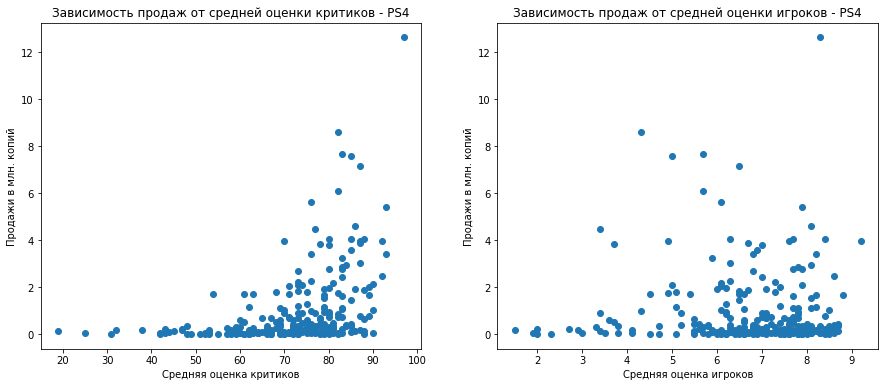

Корреляция по Пирсону продаж от оценки критиков:  0.4065679020617817
Корреляция по Пирсону продаж от оценки игроков:  -0.03195711020455645


In [14]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,6)) #строим две диаграммы рассеяния для платформы PS4
ax1.scatter(x = actual_data[actual_data.platform=='PS4']['critic_score'], y = actual_data[actual_data.platform=='PS4']['total_sales'])
ax2.scatter(x = actual_data[actual_data.platform=='PS4']['user_score'], y = actual_data[actual_data.platform=='PS4']['total_sales'])
ax1.set_xlabel('Средняя оценка критиков')
ax1.set_ylabel('Продажи в млн. копий')
ax1.set_title('Зависимость продаж от средней оценки критиков - PS4')
ax2.set_xlabel('Средняя оценка игроков')
ax2.set_ylabel('Продажи в млн. копий')
ax2.set_title('Зависимость продаж от средней оценки игроков - PS4')
plt.show()
print('Корреляция по Пирсону продаж от оценки критиков: ', actual_data[actual_data.platform=='PS4']['critic_score']
      .corr(actual_data[actual_data.platform=='PS4']['total_sales']))
print('Корреляция по Пирсону продаж от оценки игроков: ', actual_data[actual_data.platform=='PS4']['user_score']
      .corr(actual_data[actual_data.platform=='PS4']['total_sales']))

Если смотреть на средние оценки критиков и продажи игр, то можно говорить о наличии связи, но не слишком большой. Да, популярные игры - это те, у которых высокие оценки критиков, но не все игры, получившие высокие оценки продаются хорошо.

Если смотреть на оценки игроков и продажи - здесь всё куда более неоднозначно. Есть хиты, продающиеся несколькими миллионами копий и получившие смешанные отзывы игроков, что вообщем неудивительно. Игроки зачастую ставят полярно противоположные оценки продуктиам в зависимости от личных предпочтений и вкусов.

Посмотрим на общее распределение игр по жанрам на всех платформах за выбранный нами актуальный период. Для этого я построю круговую диаграмму. Также посмотрим как отличаются продажи игр разных жанров.

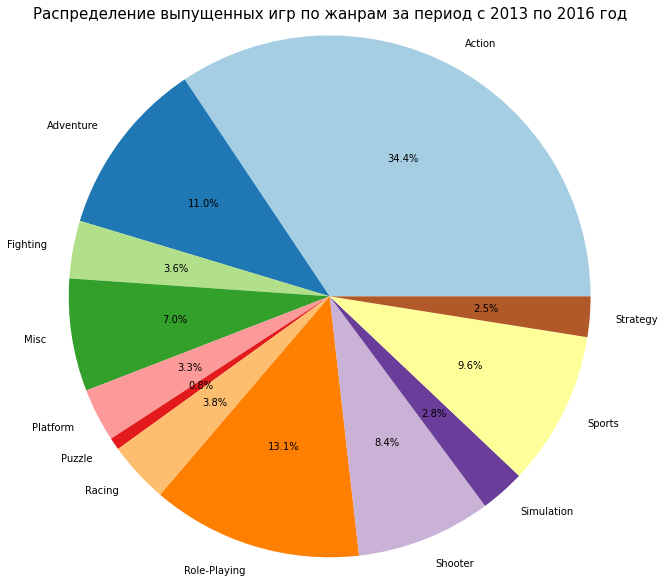

In [15]:
plt.figure(figsize=(20,10))
colors = sns.color_palette('Paired')
plt.pie(x=actual_data.groupby('genre')['genre'].count(), 
        labels=actual_data.groupby('genre')['genre'].count().index,
        colors=colors, autopct='%1.1f%%', radius=1.2) #строим круговую диаграмму по жанрам за актуальный период
plt.title('Распределение выпущенных игр по жанрам за период с 2013 по 2016 год', fontsize=15)
plt.show()

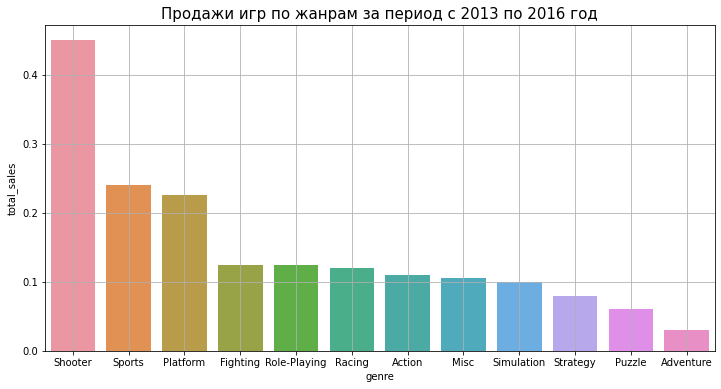

In [16]:
genres_pivot = actual_data.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(
    by='total_sales', ascending=False) #делаю сводную таблицу по продажам по разным жанрам

plt.figure(figsize=(12,6))
sns.barplot(data=genres_pivot, x=genres_pivot.index, y='total_sales') #создаю столбчатую диаграмму по жанрам
plt.title('Продажи игр по жанрам за период с 2013 по 2016 год', fontsize=15)
plt.grid(True)
plt.show()

Самые распространённые жанры - это экшн, приключения, шутеры, ролевые и спотривные игры. У экшн-игр очень большая доля среди всех выходящих игр - почти 36 процентов. Интересно что у adventure тоже немаленькая доля среди всех выходящих игр, больше, чем у спортивных, шутеров, гоночных и прочих, но по продажам они сильно отстают. Самый прибыльный жанр - шутер, средние продажи игр этого жанра в разы выше чем у игр других жанров. Также хорошо продаются спортивные симуляторы и платформеры.

### Вывод

Был проведён исследовательский анализ базы данных игр за весь период, определены самые популярные игровые плафтормы, их примерный цикл развития. На основании дальнейшего анализа я определил нужный актуальный период - с 2013 года по 2016 год, который поможет определить на данный момент определяющие факторы для успеха игры и сделать ставку на потенциально успешный в будущем проект.

## 4. Составление портрета пользователя каждого региона

Возьмём 3 главных региона игрового рынка - Северная Америка, Япония и Европа. Определим самые популярные платформы в каждом регионе, и самые популярные игровые жанры.

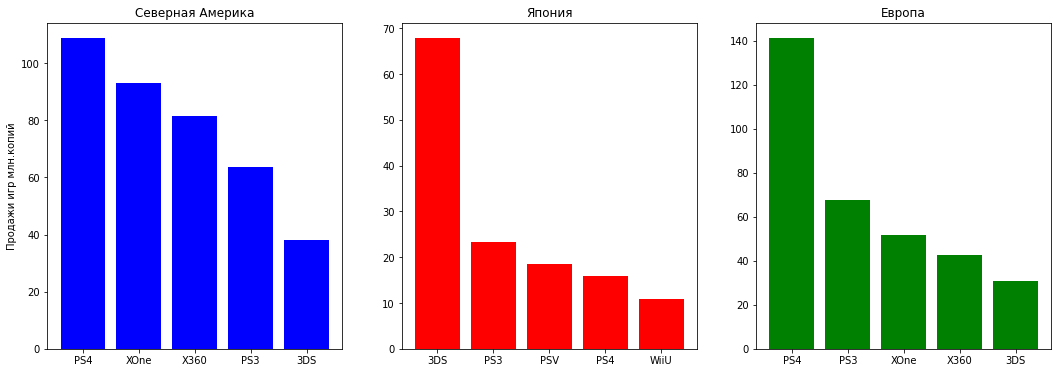

In [17]:
#сводные таблицы по плафтормам в каждом регионе
na_platforms = actual_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
jp_platforms = actual_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
eu_platforms = actual_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,6)) #строим столбчатый график по регионам
ax1.bar(na_platforms.index, na_platforms, color='Blue')
ax1.set_title('Северная Америка')
ax1.set_ylabel('Продажи игр млн.копий')
ax2.bar(jp_platforms.index, jp_platforms, color='Red')
ax2.set_title('Япония')
ax3.bar(eu_platforms.index, eu_platforms, color='Green')
ax3.set_title('Европа')

plt.show()

Cамая популярная плафторма в Северной Америке - Xbox 360, а вот новая версия Xbox One отстаёт по продажам игр от Playstation 3 и 4. В Японии Xbox ожидаемо вообще не в пятёрке лидеров, здесь с большим отрывом лидируем по продажам игр портативная Nintendo 3DS, а так же на третьем месте тоже портативная PSV. Европа по раскаду сил - это что-то среднее между Северной Америкой и Японией, Но всё же приставки Sony здесь более популярны, чем XBox.

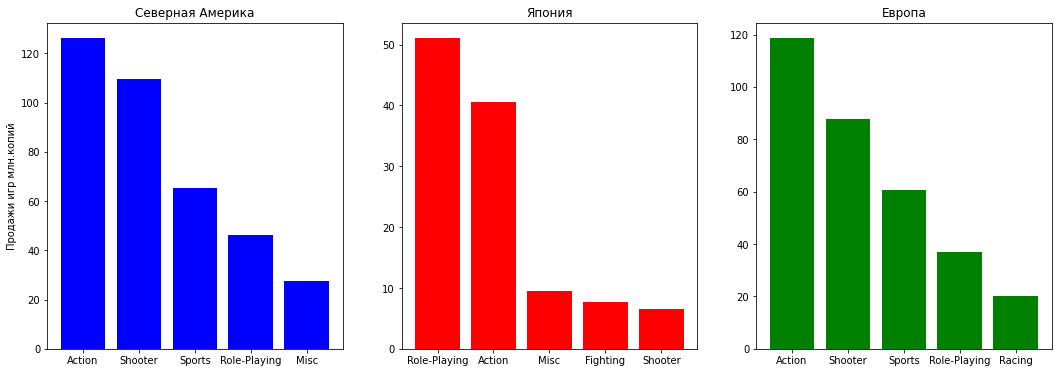

In [18]:
#сводные таблицы по жанрам в каждом регионе
na_platforms = actual_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
jp_platforms = actual_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
eu_platforms = actual_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,6) )#строим столбчатый график по регионам

ax1.bar(na_platforms.index, na_platforms, color='Blue')
ax1.set_title('Северная Америка')
ax1.set_ylabel('Продажи игр млн.копий')
ax2.bar(jp_platforms.index, jp_platforms, color='Red')
ax2.set_title('Япония')

ax3.bar(eu_platforms.index, eu_platforms, color='Green')
ax3.set_title('Европа')
plt.show()

Если рассматривать популярность игровых жанров, Европа и Северная Америка здесь очень похожи - наиболее популярны здесь экшены, шутеры, спортивные игры - никаких сюрпризов. Япония отличается - здесь очень популярен жанр ролевых игр в первую очередь, экшены на втором месте, остальные жанры заметно отстают.

<AxesSubplot:xlabel='rating'>

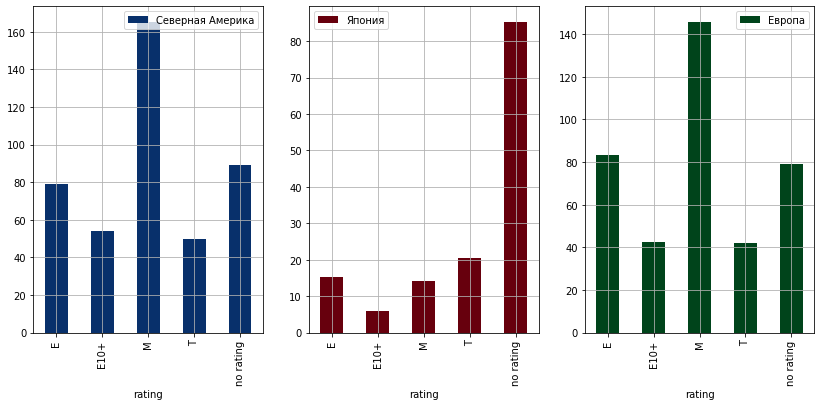

In [19]:
esrb_pivot = actual_data.pivot_table(index='rating', values=['na_sales', 'jp_sales', 'eu_sales'], aggfunc='sum') #сводная таблица по возрастному рейтингу

fig,axes = plt.subplots(1,3,figsize = (14,6))
esrb_pivot.plot(y='na_sales', kind = 'bar', colormap = 'Blues_r',stacked = True,grid = True,ax = axes[0], label='Северная Америка')
esrb_pivot.plot(y='jp_sales', kind = 'bar', colormap = 'Reds_r',stacked = True,grid = True,ax = axes[1], label='Япония')
esrb_pivot.plot(y='eu_sales', kind = 'bar', colormap = 'Greens_r',stacked = True, grid = True,ax = axes[2], label='Европа')

Что касается продаж игр в зависимости от их возрастного рейтинга, ситуация в Европе и Северной Америке одинаковая - больше всего продаются продукты категории Mature (17+), также Everyone и игры без рейтинга. В Японии же большая часть суммарных продаж - это игры без рейтинга ESRB - это по сути игры выпущенные для внутреннего рынка, и часто не выпускающиеся на западе.

### Вывод

Проведён анализ трёх главных рынков продажи видеоигр. Рынки двух из них - Европы и Северной Америки очень похожи в плане самых продаевых игровых жанров - экшены и шутеры любимы больше всего. В плане самые популярные - Xbox и Playstation прошлого и текущего поколений. Тогда как консоли Nintendo популярны в основном только в Японии - там рынок отличается, и в том числе и в предпочитаемых жанрах - здесь хорошо продаются не только экшены, но и ролевые игры и симуляторы.

## Проверка гипотез

Первая гипотеза на рассмотрении: о средних пользовательских рейтингах платформ Xbox One и PC одинаковые. Нулевой гипотезой в нашем случае будет: средние пользовательские рейтинги на платформах XBox One и PC одинаковые. Альтернативная гипотеза - средние пользовательские рейтинги отличаются.


In [20]:
alpha = 0.05 #задаём стандартное пороговое значение
#применяем метод scipy.stats.ttest_ind() для проверки гипотезы о равенстве среднего двух генеральных совокупностей 
results = st.ttest_ind(actual_data[actual_data['platform']=='XOne']['user_score'].dropna(),
                       actual_data[actual_data['platform']=='PC']['user_score'].dropna())
print('P-value:', results.pvalue)

if (results.pvalue < alpha): #если p-value меньше уровня критической значимости
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

P-value: 0.15503167687396294
Не получилось отвергнуть нулевую гипотезу


Следующая гипотеза, что средние пользовательские рейтинги жанров Action и Sports разные. Нулевая гипотеза здесь будет: средние пользовательские рейтинги спортивных и экшн-игр равны. Альтернативная - рейтинги отличаются.


In [21]:
#оставлено стандартное пороговое значение
#применяем метод scipy.stats.ttest_ind() для проверки гипотезы о равенстве среднего двух генеральных совокупностей 
results = st.ttest_ind(actual_data[actual_data['genre']=='Action']['user_score'].dropna(),
                       actual_data[actual_data['genre']=='Sports']['user_score'].dropna())
print('P-value:', results.pvalue)

if (results.pvalue < alpha): #если p-value меньше уровня критической значимости
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

P-value: 8.11729623919141e-28
Отвергаем нулевую гипотезу


### Вывод
С помощью статистических тестов были проверены две гипотезы. Гипотеза о том, что пользовательские рейтинги PC и Xbox One одинаковые, не была отвергнута в ходе теста. Вторая гипотеза - о том что пользовательские рейтинги игр жанра экшн и спортивных игр отличаются. Здесь нулевая гипотеза о равенстве была отвергнута.

## Общий вывод



В ходе данного проекта мной была изучена база данных игр, выпущенных за большой период времени - с 1980 по 2016 годы. В датафрейме была самая главная информация, включающая жанр, рейтинги, показатели продаж. Данные были загружены, изучены и предварительно описаны

Перед тем как приступить к непосредственно анализу, данные были предобработаны. Заполнены где возможно пропуски, где необходимо - заменены типы данных. Многие пропуски пришлось оставить как есть - где не было адекватного пути их заполнения без отрицательного влияния на последующий анализ.

В ходе последующего ииследовательского анализа данных я изучил общую историю игрового рынка, построив графики на основе данных датафрейма увидел как рос этот рынок, какие платформы появлялись, становились самыми популярными, уходили с течением времени. Средняя длина цикла одной игровой платформы - 10 лет, последняя смена поколений произошла в 2012-2013 годах. Для прогнозирования будущих продаж я выбрал актуальный период как раз с 2013 года - выходят новые платформы и плавно начинают захватывать большую долю игрового рынка. Две основные перспективные платформы здесь - это Playstation 4 и Xbox One. Количество выходящих игр растёт, продажи тоже, учитывая что 2016 год неполный, можно предположить что и в 2017 году рост не прекратится. Самые распространённые игровые жанры во всём мире - экшены, шутеры, приключения, ролевые и спортивные игры - у них самые большие доли от всего количества выходящих игр.

Если оценивать прибыльность жанров - больше всего в среднем приносит шутер, а так же прибыльны платформеры и спортивные симуляторы. Тут стоит заметить, что хороший шутер также требует большого бюджета на разработку. Это же касается и спортивных симуляторов - здесь бюджет нужен на различные лицензии.

Что касается оценок игр: у хитов с большими продажами как правило высокие оценки критиков, что и неудивительно. Зависимость здесь есть, но не всегда такая сильная - есть игры с высокими оценками, которые никак не хотят продаваться большими тиражами. Оценки пользователей у хитовых игр самые разные - некоторые действительно высоки, некоторые смешанные - игры обожают и ненавидят одновременно, в зависимости от личных пристрастий.

Изучены три главных игровых рынка игр - Северная Америка, Европа и Япония. Северная Америка оказалось во многом похожа на Европу - здесь также любят экшены, шутеры и спортивные игры. Япония отличается тем, что здесь очень популярен жанр РПГ, а также различные симуляторы, хотя и экшены тоже очень популярны. Что касается платформ - в Японии ожидаемо почти весь рынок занимают японские же платформы Sony и Nintendo. Ещё одна важная особенность - высокие продажи на портативных платформах (3DS и PSV). В Америке и Европе популярны и Playstation и Xbox, но в разных пропорциях. В северной Америке посильней позиции Xbox, в Европе - PS. Но в целом позиции нового XBox One судя по графику по миру выглядят слабее его предыдущей версии 360 в годы его подьёма.

В ходе проверки статистическими тестами было опеределено, что пользовательские рейтинги игр на платформах PC и Xbox One скорее одинаковые. Также определил, что средние пользовательские рейтинги игр жанров Action и Sports разные.

Итак, каковы главные определяющие успех будущей игры факторы? Во-первых, это несомненно её качество. Высокая оценка критиков - в большинстве случаев знак этого качества, хитовые игры - это игры с высокими оценками. Несомненно, бюджет и правильное продвижение тоже имеют определящее значение. Оптимальный возрастной рейтинг - E (для всех) - позволит продать игру максимальному количеству игроков по всему миру, но если делать игру самого прибыльного жанра шутер, то сложно будет уложиться в требования этого рейтинга. Также качественный шутер требует достаточно серьёзного бюджета при разработке.

В целом если ориентироваться на хорошие продажи при приемлемом бюджете - наиболее оптимально будет жанр платформер с возрастным рейтингом Everyone (Teen) и выход на двух главных актуальных плафтормах - PlayStation 4 и XBox One, это позволит обеспечить неплохие продажи на всех основных рынках.
